The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


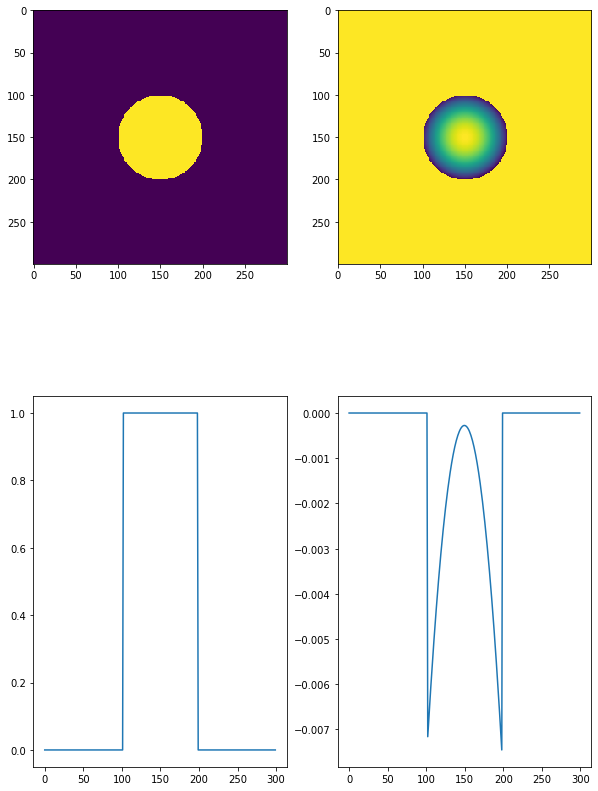

In [42]:
%load_ext autoreload
%autoreload 2
from numpy.fft import fft2, ifft2, fftshift
from numpy import pi
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.scimath import sqrt
na = 0.1
nsample = 300
wlen = 0.5E-6
ps = 2.4E-6
zdef = 1E-6

def aberrated_pupil(nsample, ps, na, wlen, zdef):
    kmax = pi/ps
    f0 = na*2*pi/wlen
    krange = np.arange(-kmax, kmax, 2*kmax/(nsample-1))
    kxm, kym = np.meshgrid(krange, krange)
    ctf = (kxm**2+kym**2)<na*2*pi/wlen
    kzm = sqrt((2*pi/wlen)**2 - kxm**2-kym**2)
    pupil = np.exp(1j*z*np.real(kzm))*np.exp(-np.abs(zdef)*np.abs(np.imag(kzm)))
    return pupil

def generate_ctf(radius, npx):
    xx, yy = np.meshgrid(range(npx), range(npx))
    mesh = (xx-npx//2)**2+(yy-npx//2)**2
    ctf = [mesh < radius**2][0]
    return ctf

def aberrated_pupil_(nsample, ps, wlen, zdef):
    c0 = (2*pi/wlen)**2
    c1 = (pi/ps)**2
    kxm, kym = np.ogrid[-1:1:1j*nsample, -1:1:1j*nsample]
    ctf = generate_ctf(50, nsample)
    kzm = sqrt(c0-c1*kxm**2-c1*kym**2)
    pupil = np.exp(1j*z*np.real(kzm))*np.exp(-np.abs(zdef)*np.abs(np.imag(kzm)))
    return pupil*ctf

pupil = aberrated_pupil_(nsample, ps,  wlen, zdef)
fig, axes = plt.subplots(2,2, figsize=(10,15))
axes[0][0].imshow(np.abs(pupil))
axes[0][1].imshow(np.angle(pupil))
linecut = 140
axes[1][0].plot(np.abs(pupil)[linecut])
axes[1][1].plot(np.angle(pupil)[linecut])

In [26]:
kzm

array([[12368462.64565185, 12369792.50150268, 12371113.29062706, ...,
        12372425.01592868, 12371113.29062706, 12369792.50150268],
       [12369792.50150268, 12371122.21439829, 12372442.8615725 , ...,
        12373754.44592807, 12372442.8615725 , 12371122.21439829],
       [12371113.29062706, 12372442.8615725 , 12373763.36779454, ...,
        12375074.81219496, 12373763.36779453, 12372442.8615725 ],
       ...,
       [12372425.01592868, 12373754.44592807, 12375074.81219496, ...,
        12376386.11763023, 12375074.81219496, 12373754.44592806],
       [12371113.29062706, 12372442.8615725 , 12373763.36779453, ...,
        12375074.81219496, 12373763.36779453, 12372442.8615725 ],
       [12369792.50150268, 12371122.21439829, 12372442.8615725 , ...,
        12373754.44592806, 12372442.8615725 , 12371122.21439828]])